# Homework 3

In [1]:
# Import Packages
from pyspark import SparkConf, SparkContext
from pyspark.ml.linalg import Vectors
import random

### Load the Datasets

In [2]:
def readVectorsSeq(filename):
    file = open(filename, 'r')
    vector_list = []
    for row in file.readlines():
        vector_list.append(Vectors.dense([float(num_str) for num_str in row.split()]))
    return vector_list

In [3]:
vector_list = readVectorsSeq('test-datasets/prova.txt')

# Print Info of the Dataset
print 'INFO OF THE DATASET:'
print '- Number of points:', len(vector_list)
print '- Dimensionality of a Point:', len(vector_list[0])

INFO OF THE DATASET:
- Number of points: 11
- Dimensionality of a Point: 50


## Fake 2-D Dataset for Testing

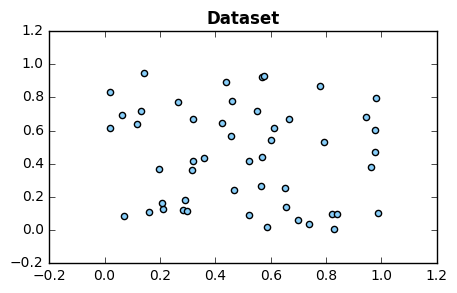

In [5]:
import numpy as np
import matplotlib.pyplot as plt

vector_list = []
np.random.seed(seed=0)
n_points = 50
for i in range(n_points):
    vector_list.append(Vectors.dense(np.random.rand(2)))

# Plot
plt.figure(figsize=(5, 3))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue')
plt.show()

### K-Centers

In [6]:
def kcenter(P, k):
    
    # Initialization
    random.shuffle(P)
    S = [P[0]]
    P.pop(0)
    
    for iteration in range(k-1):
        dist_max = 0
        idx_max = 0
        for i in range(len(P)):
            c_i = P[i]
            dist_min = Vectors.squared_distance(c_i, S[0])
            idx_min = 0
            for j in range(len(S)):
                c_j = S[j]
                dist = Vectors.squared_distance(c_i, c_j)
                if dist < dist_min:
                    dist_min = dist
                    idx_min = j
            if dist_min > dist_max:
                dist_max = dist_min
                idx_max = i
        S.append(P[idx_max])
        P.pop(idx_max)
    return S

In [7]:
P = [p for p in vector_list]
centers = kcenter(P, 5)

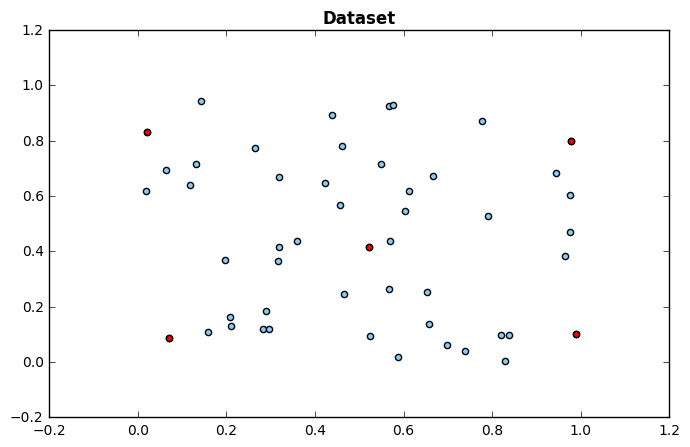

In [8]:
# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue')

for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], c='r')
plt.show()